### Day 1: Data Cleaning

In [5]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('imdb_top_1000.csv')

In [3]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Poster_Link    1000 non-null   object 
 1   Series_Title   1000 non-null   object 
 2   Released_Year  1000 non-null   object 
 3   Certificate    899 non-null    object 
 4   Runtime        1000 non-null   object 
 5   Genre          1000 non-null   object 
 6   IMDB_Rating    1000 non-null   float64
 7   Overview       1000 non-null   object 
 8   Meta_score     843 non-null    float64
 9   Director       1000 non-null   object 
 10  Star1          1000 non-null   object 
 11  Star2          1000 non-null   object 
 12  Star3          1000 non-null   object 
 13  Star4          1000 non-null   object 
 14  No_of_Votes    1000 non-null   int64  
 15  Gross          831 non-null    object 
dtypes: float64(2), int64(1), object(13)
memory usage: 125.1+ KB
None


In [4]:
df['Runtime'] = df['Runtime'].str.replace(' min', '').astype(int)

In [5]:
df['Gross'] = df['Gross'].str.replace(',', '')
df['Gross'] = pd.to_numeric(df['Gross'])

In [6]:
df['Released_Year'] = pd.to_numeric(df['Released_Year'], errors='coerce')

In [7]:
df.dropna(subset=['Released_Year'], inplace=True)

In [8]:
df['Released_Year'] = df['Released_Year'].astype(int)

In [9]:
print("Numeric columns cleaned!")
print(df[['Runtime', 'Gross', 'Released_Year']].dtypes)

Numeric columns cleaned!
Runtime            int64
Gross            float64
Released_Year      int64
dtype: object


In [10]:
# Checking how many are missing
print(df.isnull().sum())

Poster_Link        0
Series_Title       0
Released_Year      0
Certificate      101
Runtime            0
Genre              0
IMDB_Rating        0
Overview           0
Meta_score       157
Director           0
Star1              0
Star2              0
Star3              0
Star4              0
No_of_Votes        0
Gross            169
dtype: int64


In [12]:
# For 'Meta_score' and 'Gross', let's fill with the Median (to avoid skewing from huge blockbusters)
df['Gross'] = df['Gross'].fillna(df['Gross'].median())
df['Meta_score'] = df['Meta_score'].fillna(df['Meta_score'].median())

In [13]:
# For 'Certificate', fill with the Mode (Most common certificate)
df['Certificate'] = df['Certificate'].fillna(df['Certificate'].mode()[0])

In [14]:
print("Missing values handled.")

Missing values handled.


In [15]:
df.columns = [col.lower() for col in df.columns]
# Rename specific columns if you want shorter names
df.rename(columns={'series_title': 'title', 'released_year': 'year', 'imdb_rating': 'rating'}, inplace=True)

print(df.head())

                                         poster_link  \
0  https://m.media-amazon.com/images/M/MV5BMDFkYT...   
1  https://m.media-amazon.com/images/M/MV5BM2MyNj...   
2  https://m.media-amazon.com/images/M/MV5BMTMxNT...   
3  https://m.media-amazon.com/images/M/MV5BMWMwMG...   
4  https://m.media-amazon.com/images/M/MV5BMWU4N2...   

                      title  year certificate  runtime                 genre  \
0  The Shawshank Redemption  1994           A      142                 Drama   
1             The Godfather  1972           A      175          Crime, Drama   
2           The Dark Knight  2008          UA      152  Action, Crime, Drama   
3    The Godfather: Part II  1974           A      202          Crime, Drama   
4              12 Angry Men  1957           U       96          Crime, Drama   

   rating                                           overview  meta_score  \
0     9.3  Two imprisoned men bond over a number of years...        80.0   
1     9.2  An organized crime 

In [18]:
df.to_csv('cleaned_imdb_data.csv', index=False)
print("Saved to 'cleaned_imdb_data.csv'")

Saved to 'cleaned_imdb_data.csv'


### Day 2: Univariate Analysis

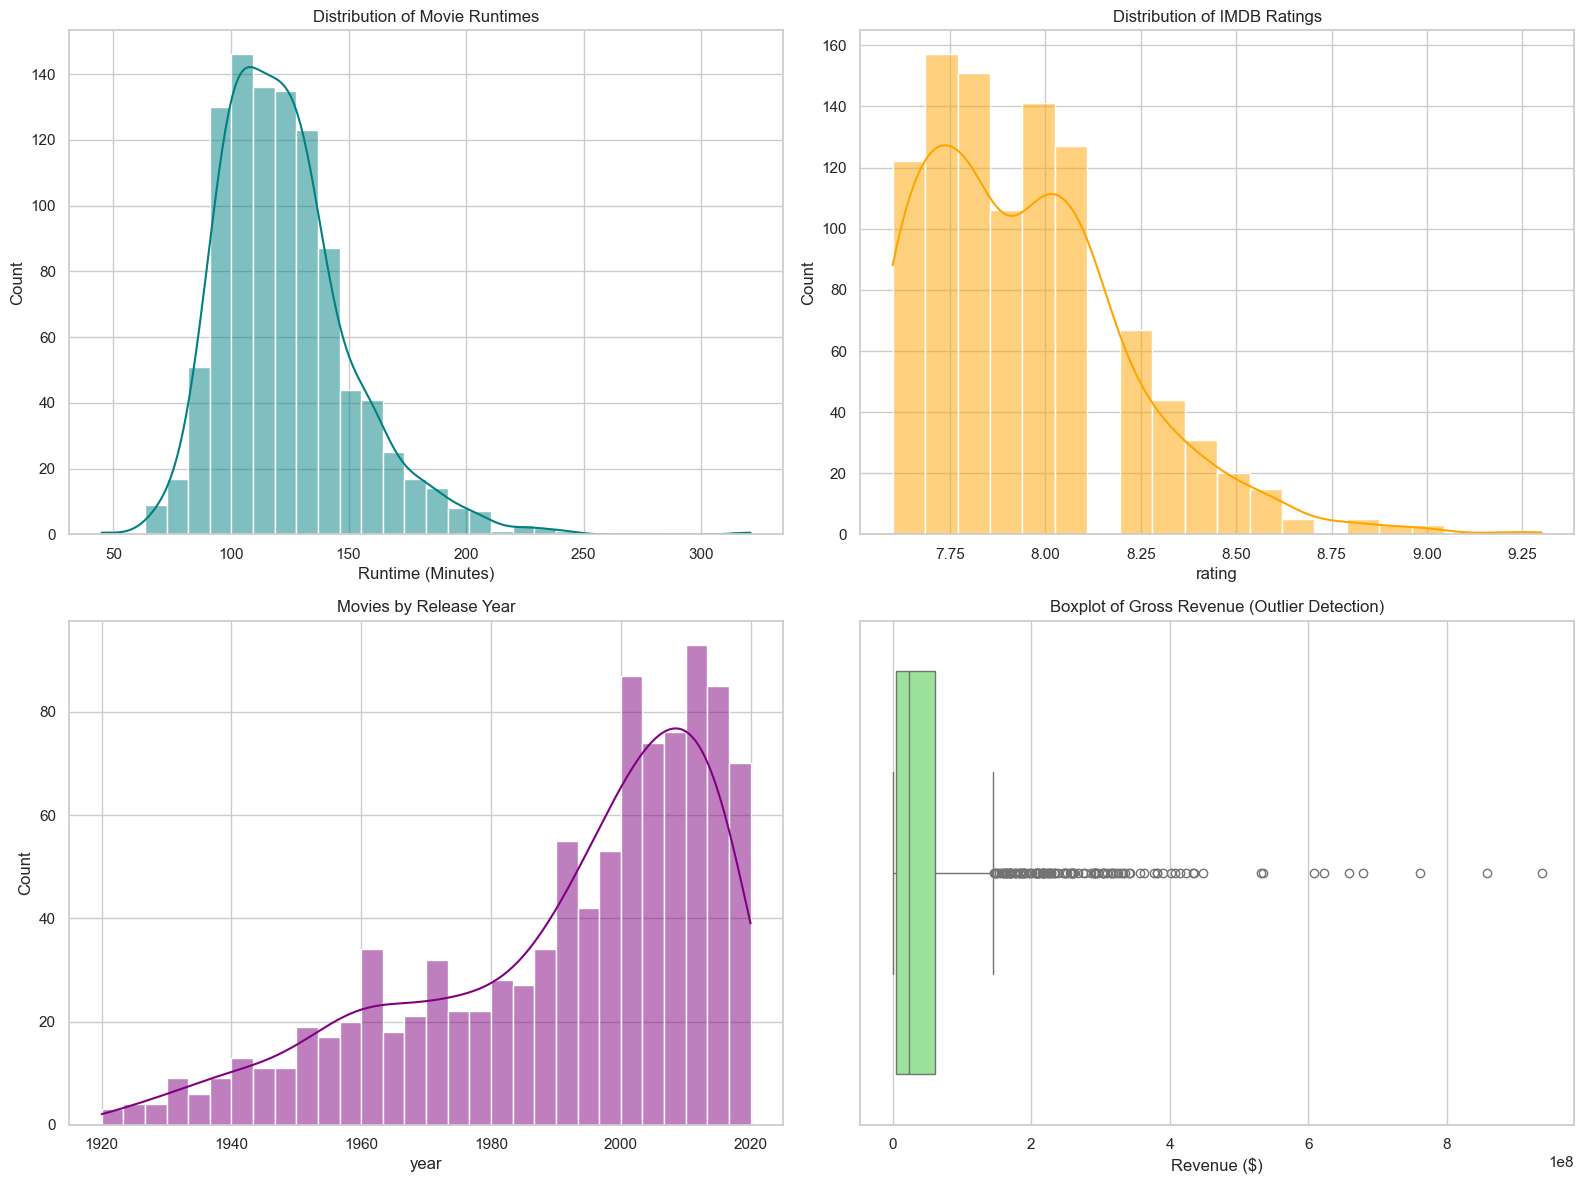

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt


sns.set_theme(style="whitegrid")
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 2. Add all the plots (The Paint)
# Runtime
sns.histplot(data=df, x='runtime', kde=True, ax=axes[0, 0], color='teal', bins=30)
axes[0, 0].set_title('Distribution of Movie Runtimes')
axes[0, 0].set_xlabel('Runtime (Minutes)')

# Rating
sns.histplot(data=df, x='rating', kde=True, ax=axes[0, 1], color='orange', bins=20)
axes[0, 1].set_title('Distribution of IMDB Ratings')

# Year
sns.histplot(data=df, x='year', kde=True, ax=axes[1, 0], color='purple', bins=30)
axes[1, 0].set_title('Movies by Release Year')

# Revenue
sns.boxplot(data=df, x='gross', ax=axes[1, 1], color='lightgreen')
axes[1, 1].set_title('Boxplot of Gross Revenue (Outlier Detection)')
axes[1, 1].set_xlabel('Revenue ($)')


plt.tight_layout()
plt.savefig('day2_dashboard.png')
plt.show()

C:\Users\sahil\AppData\Local\Temp\ipykernel_7400\2696126388.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_filtered, x='certificate', order=top_certificates, palette='viridis')
C:\Users\sahil\AppData\Local\Temp\ipykernel_7400\2696126388.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cert_revenue.index, y=cert_revenue.values, palette='magma')


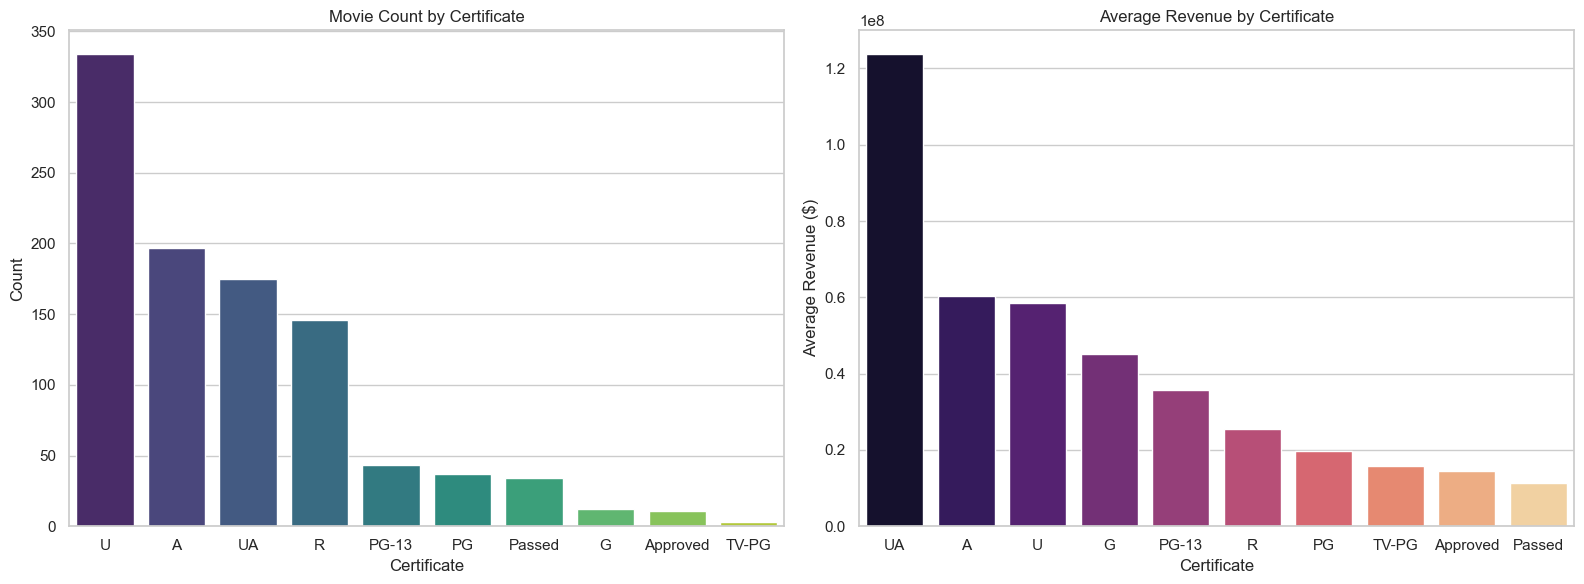

In [24]:
# --- CERTIFICATE ANALYSIS ---


top_certificates = df['certificate'].value_counts().head(10).index
df_filtered = df[df['certificate'].isin(top_certificates)]

# 2. Plotting
plt.figure(figsize=(16, 6))


plt.subplot(1, 2, 1)
sns.countplot(data=df_filtered, x='certificate', order=top_certificates, palette='viridis')
plt.title('Movie Count by Certificate')
plt.xlabel('Certificate')
plt.ylabel('Count')


plt.subplot(1, 2, 2)

cert_revenue = df_filtered.groupby('certificate')['gross'].mean().sort_values(ascending=False)
sns.barplot(x=cert_revenue.index, y=cert_revenue.values, palette='magma')
plt.title('Average Revenue by Certificate')
plt.xlabel('Certificate')
plt.ylabel('Average Revenue ($)')

plt.tight_layout()
plt.show()

### Day 3: Feature Engineering

Original rows: 999
Exploded rows: 2538
                      title genre_list        gross
0  The Shawshank Redemption      Drama   28341469.0
1             The Godfather      Crime  134966411.0
1             The Godfather      Drama  134966411.0
2           The Dark Knight     Action  534858444.0
2           The Dark Knight      Crime  534858444.0


C:\Users\sahil\AppData\Local\Temp\ipykernel_18896\967983367.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_counts.index, y=genre_counts.values, palette='viridis', ax=axes[0])
C:\Users\sahil\AppData\Local\Temp\ipykernel_18896\967983367.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_gross.index, y=genre_gross.values, palette='magma', ax=axes[1])


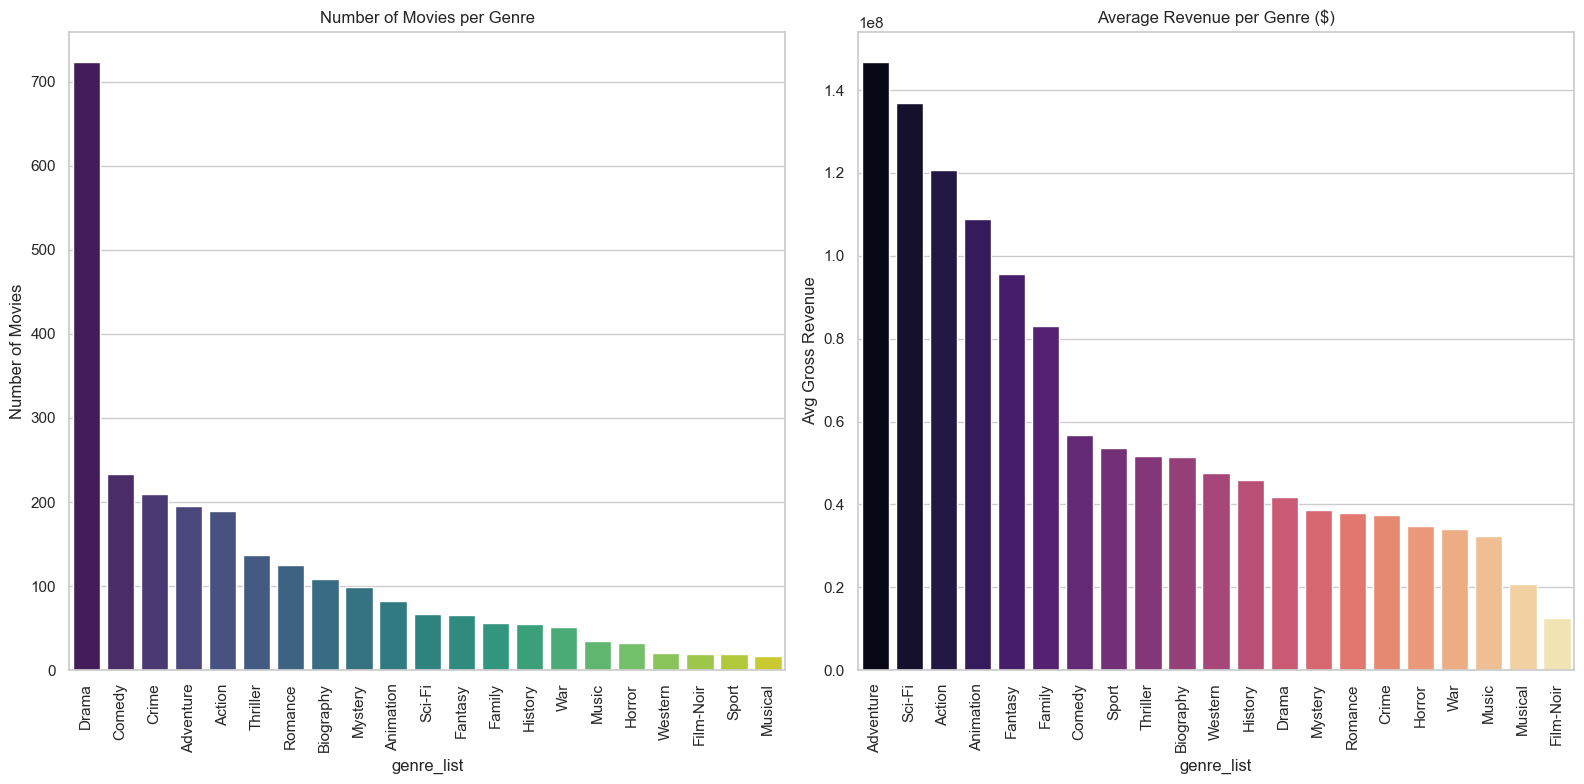

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Load your clean data
df = pd.read_csv('cleaned_imdb_data.csv')

# 2. FEATURE ENGINEERING: Explode Genres
df['genre_list'] = df['genre'].str.split(', ')

# If a movie has 3 genres, it now appears 3 times in 'df_exploded'
df_exploded = df.explode('genre_list')

print(f"Original rows: {df.shape[0]}")
print(f"Exploded rows: {df_exploded.shape[0]}")
print(df_exploded[['title', 'genre_list', 'gross']].head())

sns.set_theme(style="whitegrid")
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

# Plot A: Which Genre is most common?
genre_counts = df_exploded['genre_list'].value_counts()
sns.barplot(x=genre_counts.index, y=genre_counts.values, palette='viridis', ax=axes[0])
axes[0].set_title('Number of Movies per Genre')
axes[0].tick_params(axis='x', rotation=90)
axes[0].set_ylabel('Number of Movies')

# Plot B: Which Genre makes the most money
# We calculate the mean revenue for each genre
genre_gross = df_exploded.groupby('genre_list')['gross'].mean().sort_values(ascending=False)
sns.barplot(x=genre_gross.index, y=genre_gross.values, palette='magma', ax=axes[1])
axes[1].set_title('Average Revenue per Genre ($)')
axes[1].tick_params(axis='x', rotation=90)
axes[1].set_ylabel('Avg Gross Revenue')

plt.tight_layout()
plt.savefig('day3_genre_analysis.png')
plt.show()

### Day 4: Time Series Analysis

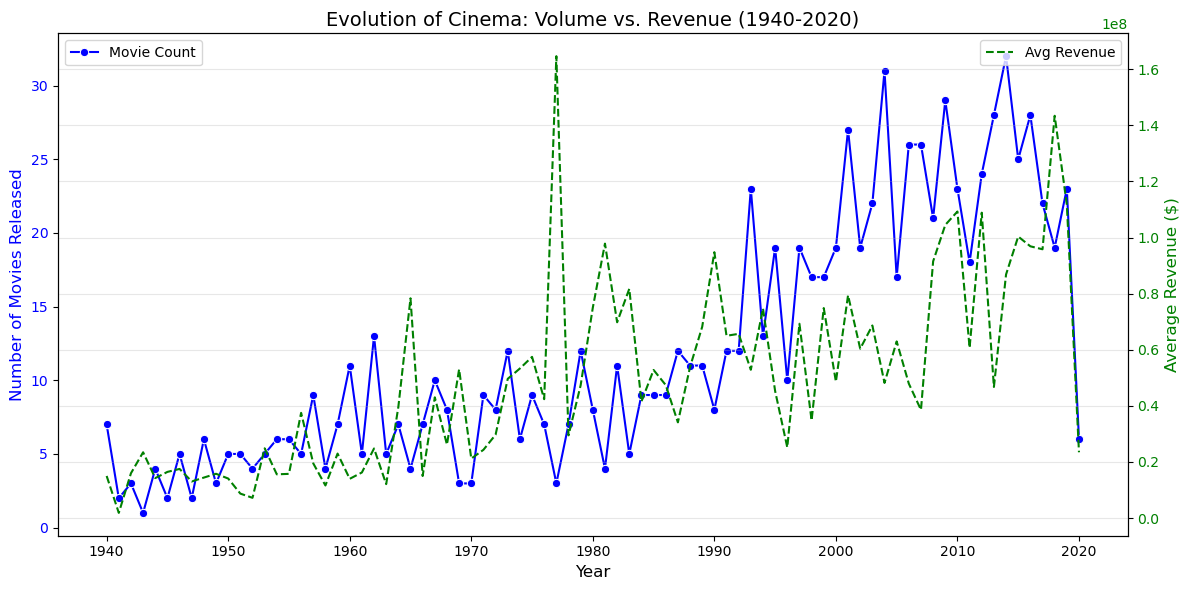

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


df = pd.read_csv('cleaned_imdb_data.csv')

# Group by Year
# We calculate 3 things: Total Movies, Average Revenue, Average Rating
year_data = df.groupby('year').agg({
    'title': 'count', 
    'gross': 'mean', 
    'rating': 'mean'
}).reset_index()

# Filter for relevant years
year_data = year_data[year_data['year'] >= 1940]

# The "Industry Growth" Chart
fig, ax1 = plt.subplots(figsize=(12, 6))

# Number of Movies (Blue)
sns.lineplot(data=year_data, x='year', y='title', ax=ax1, color='blue', marker='o', label='Movie Count')
ax1.set_ylabel('Number of Movies Released', color='blue', fontsize=12)
ax1.tick_params(axis='y', labelcolor='blue')
ax1.set_xlabel('Year', fontsize=12)

# Create a second Y-axis for Revenue
ax2 = ax1.twinx()

# Average Revenue (Green)
sns.lineplot(data=year_data, x='year', y='gross', ax=ax2, color='green', linestyle='--', label='Avg Revenue')
ax2.set_ylabel('Average Revenue ($)', color='green', fontsize=12)
ax2.tick_params(axis='y', labelcolor='green')


plt.title('Evolution of Cinema: Volume vs. Revenue (1940-2020)', fontsize=14)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('day4_trends.png')
plt.show()

### Day 5: Cast and Crew Analysis

C:\Users\sahil\AppData\Local\Temp\ipykernel_12072\2101693059.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_directors.values, y=top_directors.index, palette='viridis', ax=axes[0])
C:\Users\sahil\AppData\Local\Temp\ipykernel_12072\2101693059.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_actors.values, y=top_actors.index, palette='magma', ax=axes[1])


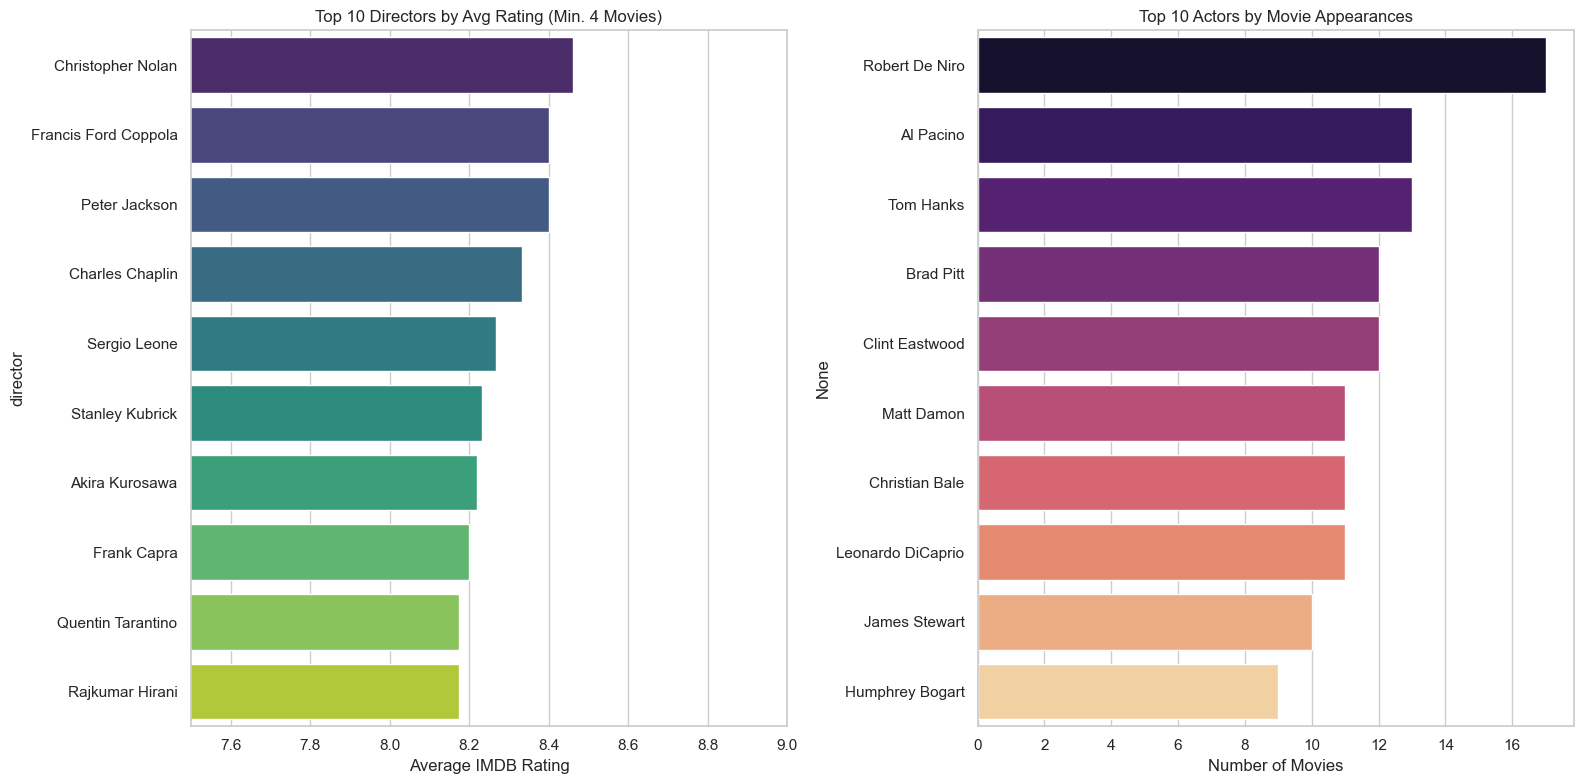

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('cleaned_imdb_data.csv')

sns.set_theme(style="whitegrid")
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

#A: Top Directors
#Only directors with >= 4 movies in the list
director_counts = df['director'].value_counts()
active_directors = director_counts[director_counts >= 4].index
df_directors = df[df['director'].isin(active_directors)]

# Calculate Average Rating
top_directors = df_directors.groupby('director')['rating'].mean().sort_values(ascending=False).head(10)

# Plot A
sns.barplot(x=top_directors.values, y=top_directors.index, palette='viridis', ax=axes[0])
axes[0].set_title('Top 10 Directors by Avg Rating (Min. 4 Movies)')
axes[0].set_xlabel('Average IMDB Rating')
axes[0].set_xlim(7.5, 9.0) # Zoom in to differentiate

#B: Top Actors (Quantity)
# We have Star1, Star2, Star3, Star4. We need to stack them.
all_actors = pd.concat([df['star1'], df['star2'], df['star3'], df['star4']])
top_actors = all_actors.value_counts().head(10)

# Plot B
sns.barplot(x=top_actors.values, y=top_actors.index, palette='magma', ax=axes[1])
axes[1].set_title('Top 10 Actors by Movie Appearances')
axes[1].set_xlabel('Number of Movies')

plt.tight_layout()
plt.savefig('day5_cast_analysis.png')
plt.show()

### Day 6: Multivariate Analysis

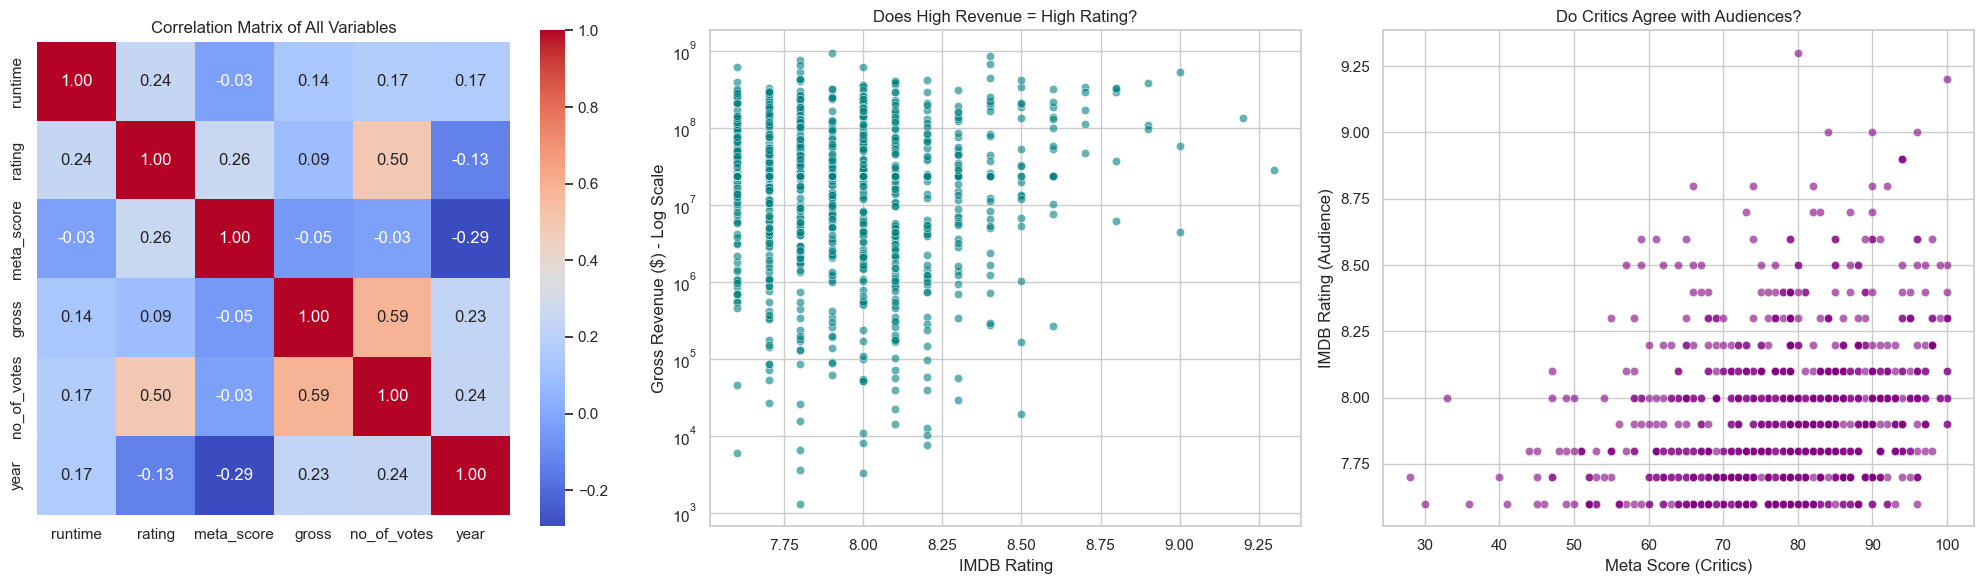

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Load Data
df = pd.read_csv('cleaned_imdb_data.csv')

# 2. Select Columns for Correlation
# We only want numeric columns that matter
numeric_cols = ['runtime', 'rating', 'meta_score', 'gross', 'no_of_votes', 'year']
corr_data = df[numeric_cols]

# Calculate the Correlation Matrix (The math part)
corr_matrix = corr_data.corr()

# 3. Visualization Dashboard
sns.set_theme(style="whitegrid")
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

# Plot A: The Heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", ax=axes[0], square=True)
axes[0].set_title('Correlation Matrix of All Variables')

# Plot B: Revenue vs. Rating
sns.scatterplot(data=df, x='rating', y='gross', alpha=0.6, color='teal', ax=axes[1])
axes[1].set_title('Does High Revenue = High Rating?')
axes[1].set_xlabel('IMDB Rating')
axes[1].set_ylabel('Gross Revenue ($) - Log Scale')
axes[1].set_yscale('log') 

# Plot C: Critics vs. Audience
sns.scatterplot(data=df, x='meta_score', y='rating', alpha=0.6, color='purple', ax=axes[2])
axes[2].set_title('Do Critics Agree with Audiences?')
axes[2].set_xlabel('Meta Score (Critics)')
axes[2].set_ylabel('IMDB Rating (Audience)')

plt.tight_layout()
plt.savefig('day6_multivariate.png')
plt.show()

C:\Users\sahil\AppData\Local\Temp\ipykernel_9984\1468593331.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_gross.values, y=genre_gross.index, palette='magma', ax=axes[0, 0])


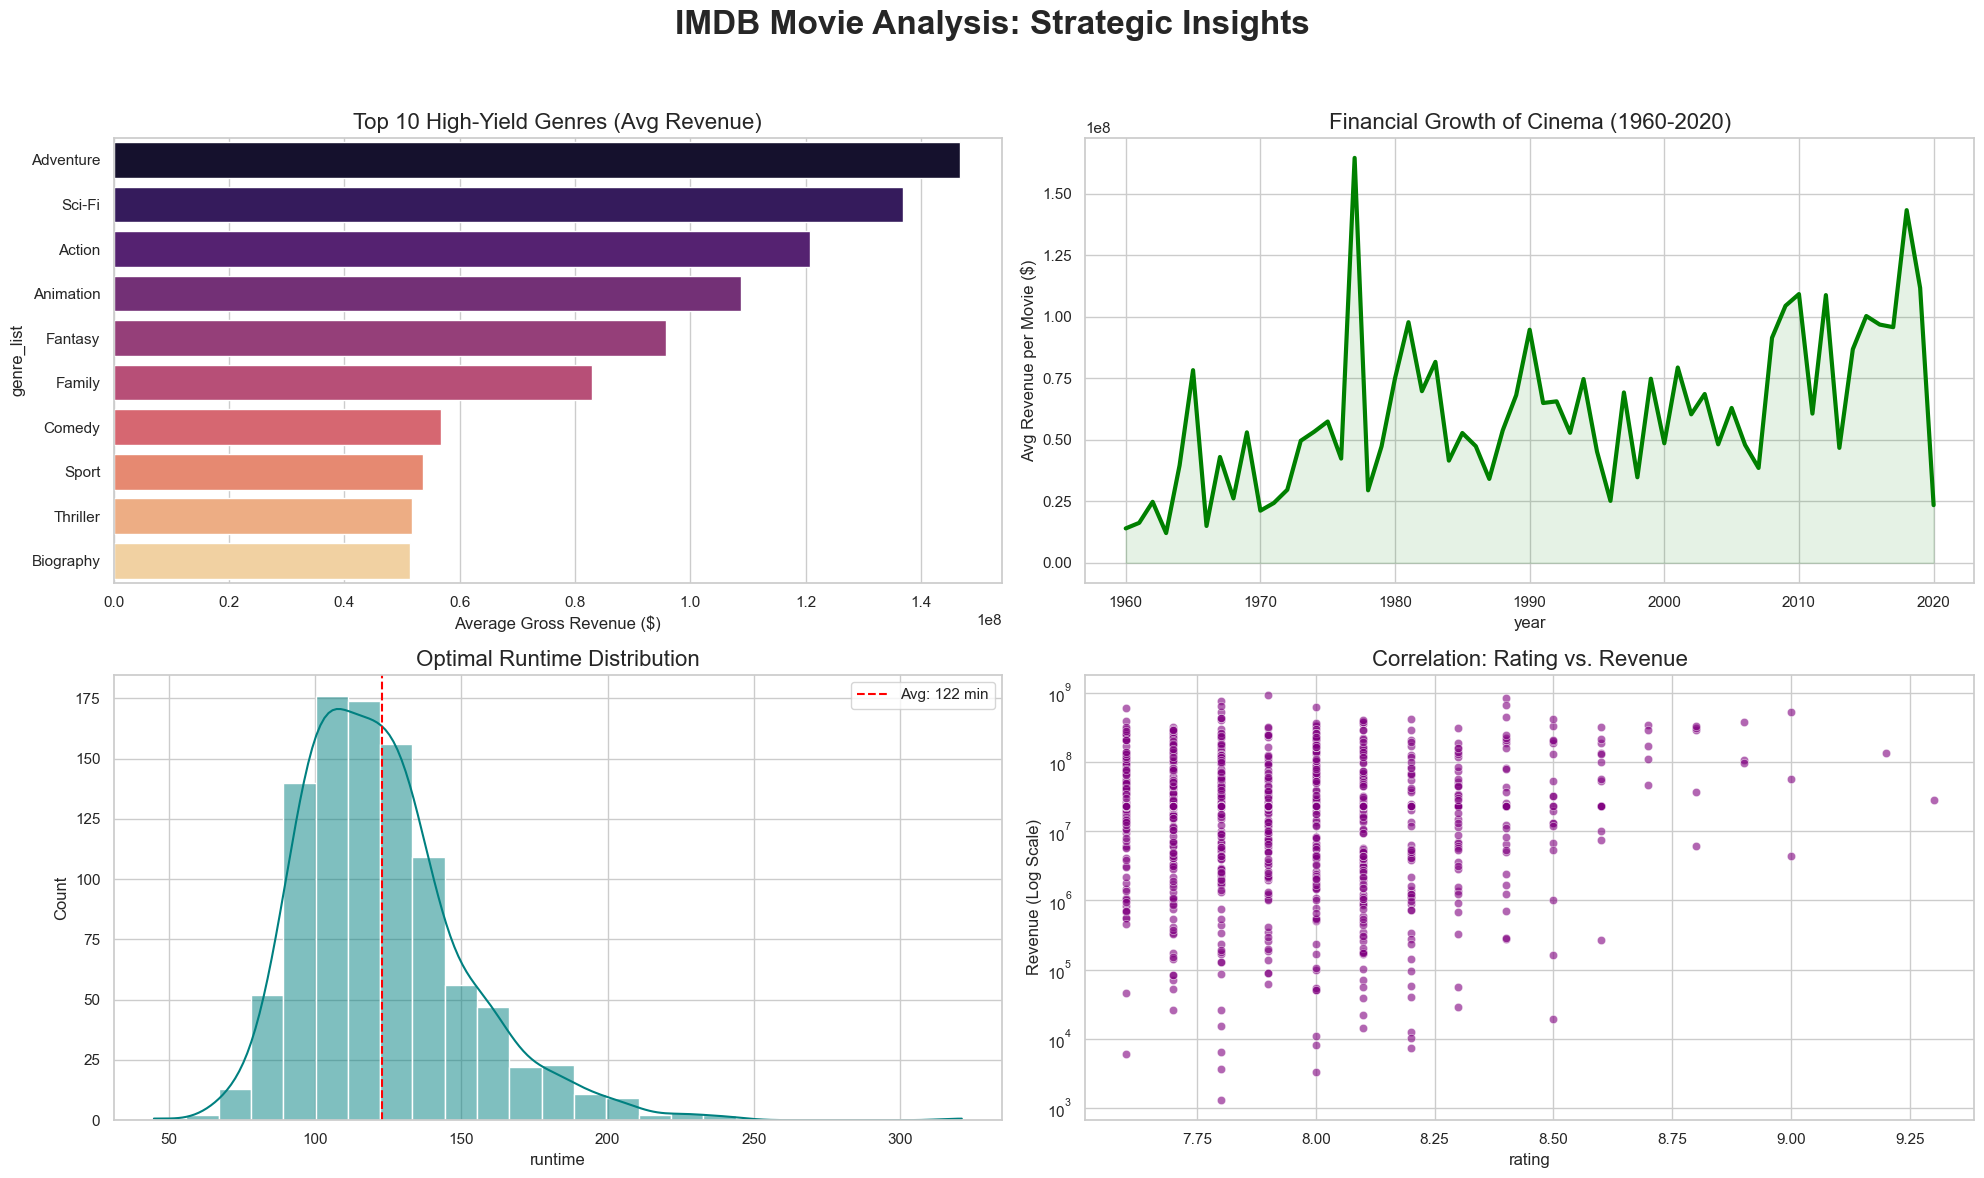

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Load Data
df = pd.read_csv('cleaned_imdb_data.csv')

df['genre_list'] = df['genre'].str.split(', ')
df_exploded = df.explode('genre_list')


sns.set_theme(style="whitegrid")
fig, axes = plt.subplots(2, 2, figsize=(20, 12))
fig.suptitle('IMDB Movie Analysis: Strategic Insights', fontsize=24, weight='bold', y=0.98)

# Top Left: The "Money" Insight
# Question: What should we produce to make money?
genre_gross = df_exploded.groupby('genre_list')['gross'].mean().sort_values(ascending=False).head(10)
sns.barplot(x=genre_gross.values, y=genre_gross.index, palette='magma', ax=axes[0, 0])
axes[0, 0].set_title('Top 10 High-Yield Genres (Avg Revenue)', fontsize=16)
axes[0, 0].set_xlabel('Average Gross Revenue ($)')

# Top Right: The "Growth" Insight
# Question: Is the industry growing?
year_data = df.groupby('year')['gross'].mean().reset_index()
year_data = year_data[year_data['year'] >= 1960] # Focus on modern era
sns.lineplot(data=year_data, x='year', y='gross', color='green', linewidth=3, ax=axes[0, 1])
axes[0, 1].set_title('Financial Growth of Cinema (1960-2020)', fontsize=16)
axes[0, 1].set_ylabel('Avg Revenue per Movie ($)')
axes[0, 1].fill_between(year_data['year'], year_data['gross'], color='green', alpha=0.1)

# Bottom Left: The "Product" Insight
# Question: How long should the movie be?
sns.histplot(data=df, x='runtime', kde=True, bins=25, color='teal', ax=axes[1, 0])
axes[1, 0].set_title('Optimal Runtime Distribution', fontsize=16)
axes[1, 0].axvline(df['runtime'].mean(), color='red', linestyle='--', label=f"Avg: {int(df['runtime'].mean())} min")
axes[1, 0].legend()

# Bottom Right: The "Quality" Myth
# Question: Do better ratings equal more money?
sns.scatterplot(data=df, x='rating', y='gross', alpha=0.6, color='purple', ax=axes[1, 1])
axes[1, 1].set_title('Correlation: Rating vs. Revenue', fontsize=16)
axes[1, 1].set_ylabel('Revenue (Log Scale)')
axes[1, 1].set_yscale('log')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.savefig('day7_executive_dashboard.png')
plt.show()